# IBM Data Science Capstone Project - Car Accident Severity

## 1. Introduction/Business Problem
Car accidents happen around us everyday. According to the data reported by World Health Organization, approximately 1.35 million people die each year as a result of road traffic crashes. Road traffic crashes cost most countries 3% of their gross domestic product. The severity of road accidents may differ depending on whether there is only perperty damage, or there are people injured, seriously injured, or dead. In this project, we will be looking at a data set reported by the Seattle Transportation Department which include various features of a reported road accident. We will look at how these features affect the severity of road accidents and build a binary machine learning model to predict the severity level of road accidents given their information. It would be significantly useful for general public to be aware of what aspects may lead to road accidents so people can pay more attention to these aspects. This project can also be used for health department such as hospitals or insurance enterprises to preparare for the accidents knowing what severity level a road accident may be. For example, if an accidents involves injury, then medical care equipments and professionals will be needed; if not, it prevents the waste of unnecessary social resource so other people in need will receive proper assistance. 

## 2. Data Collection
The data we will be using for this project is the dataset from SDOT Traffic Management Division, Traffic Records Group.  This dataset contains all collisions provided by SPD and recorded by Traffic Records including features relative to car accidents such as the location, collision type, number of people involved in the accidents, weather condition, road condition, light condition, whether the driver was under influence or speeding etc. The target feature we want to predict is the severity level of an accidents, level 1 being there is only property damage; level 2 being there is injury involved in the accident. For more detailed description of each variable, check out the link down below: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

## 3. Data Understanding

### 3.1.1 Load Data and Set up Environment

In [127]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Data-Collisions.csv')

### 3.1.2 Overview of dataset

First we will take a look at the first 5 rows of the dataframe. 

In [128]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [129]:
print('The Dimension of this dataset is: ' + str(df.shape))

The Dimension of this dataset is: (194673, 38)


Then we will look athe what variables are in this dataframe and their datatypes and statistic destriptions. 

In [130]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [132]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [133]:
df.describe(include=['O'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,115,62,2
top,1782439,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


## 3.1.3 Missing Values

In [134]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PEDROWNOTGRNT,190006,0.976026
EXCEPTRSNDESC,189035,0.971039
SPEEDING,185340,0.952058
INATTENTIONIND,164868,0.846897
INTKEY,129603,0.665747
EXCEPTRSNCODE,109862,0.564341
SDOTCOLNUM,79737,0.409595
JUNCTIONTYPE,6329,0.032511
Y,5334,0.027400
X,5334,0.027400


It looks like variables PEDROWNOTGRNT, EXCEPTRSNDESC, SPEEDING, INATTENTIONIND, INTKEY, EXCEPTRSNCODE, SDOTCOLNUM all have missing values over 15%. Since EXCEPTRSNDESC, INTKEY, EXCEPTRSNCODE, SDOTCOLNUM does not contain much useful informtion therefore we will drop these columns. Then we will take a closer look at variables INATTENTIONIND, UNDERINFL, SPEEDING, PEDROWNOTGRNT later. 

### 3.2 Data Correcting

In [135]:
print(df['INATTENTIONIND'].value_counts())
print(df['UNDERINFL'].value_counts())
print(df['SPEEDING'].value_counts())
print(df['PEDROWNOTGRNT'].value_counts())

Y    29805
Name: INATTENTIONIND, dtype: int64
N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64
Y    9333
Name: SPEEDING, dtype: int64
Y    4667
Name: PEDROWNOTGRNT, dtype: int64


In the dataset, these 3 columns INATTENTIONIND, SPEEDING, PEDROWNOTGRNT only contain value 'Y', NaN indicates this condition does not apply. For further data visualization and machine learning model building, I will replace value 'Y' with integer 1, and fill in NaN values with integer 0. For column UNDERINFL, it has 4 values: 'Y', 'N', 1, and 0. For the same purpose, we will replace 'Y' and 'N' with integer 1 and 0 respectively. 


In [136]:
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace('N', 0, inplace = True)
df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace('Y', 1, inplace = True)
df["UNDERINFL"] = df["UNDERINFL"].astype(str).astype(int)
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace('N', 0, inplace = True)

In [137]:
print(df['INATTENTIONIND'].value_counts())
print(df['UNDERINFL'].value_counts())
print(df['SPEEDING'].value_counts())
print(df['PEDROWNOTGRNT'].value_counts())

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64
0    185552
1      9121
Name: UNDERINFL, dtype: int64
0    185340
1      9333
Name: SPEEDING, dtype: int64
0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64


## 3.3 Exploratory Data Analysis 

### 3.3.1 Accident Severity Level

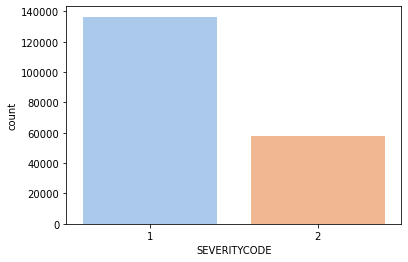

In [138]:
sns.countplot(df['SEVERITYCODE'], palette = 'pastel')
plt.show()

At the first glance, we can see the majority entries in this dataset is Level 1, around 70% of the data is in the level 1 group, that is something that we should keep in mind when we do data pre-processing before feeding into machine learning models since the data is not balanced. 

### 3.3.2 Distribution of Pedestrian, Bicycles, Vehicle and Person Count

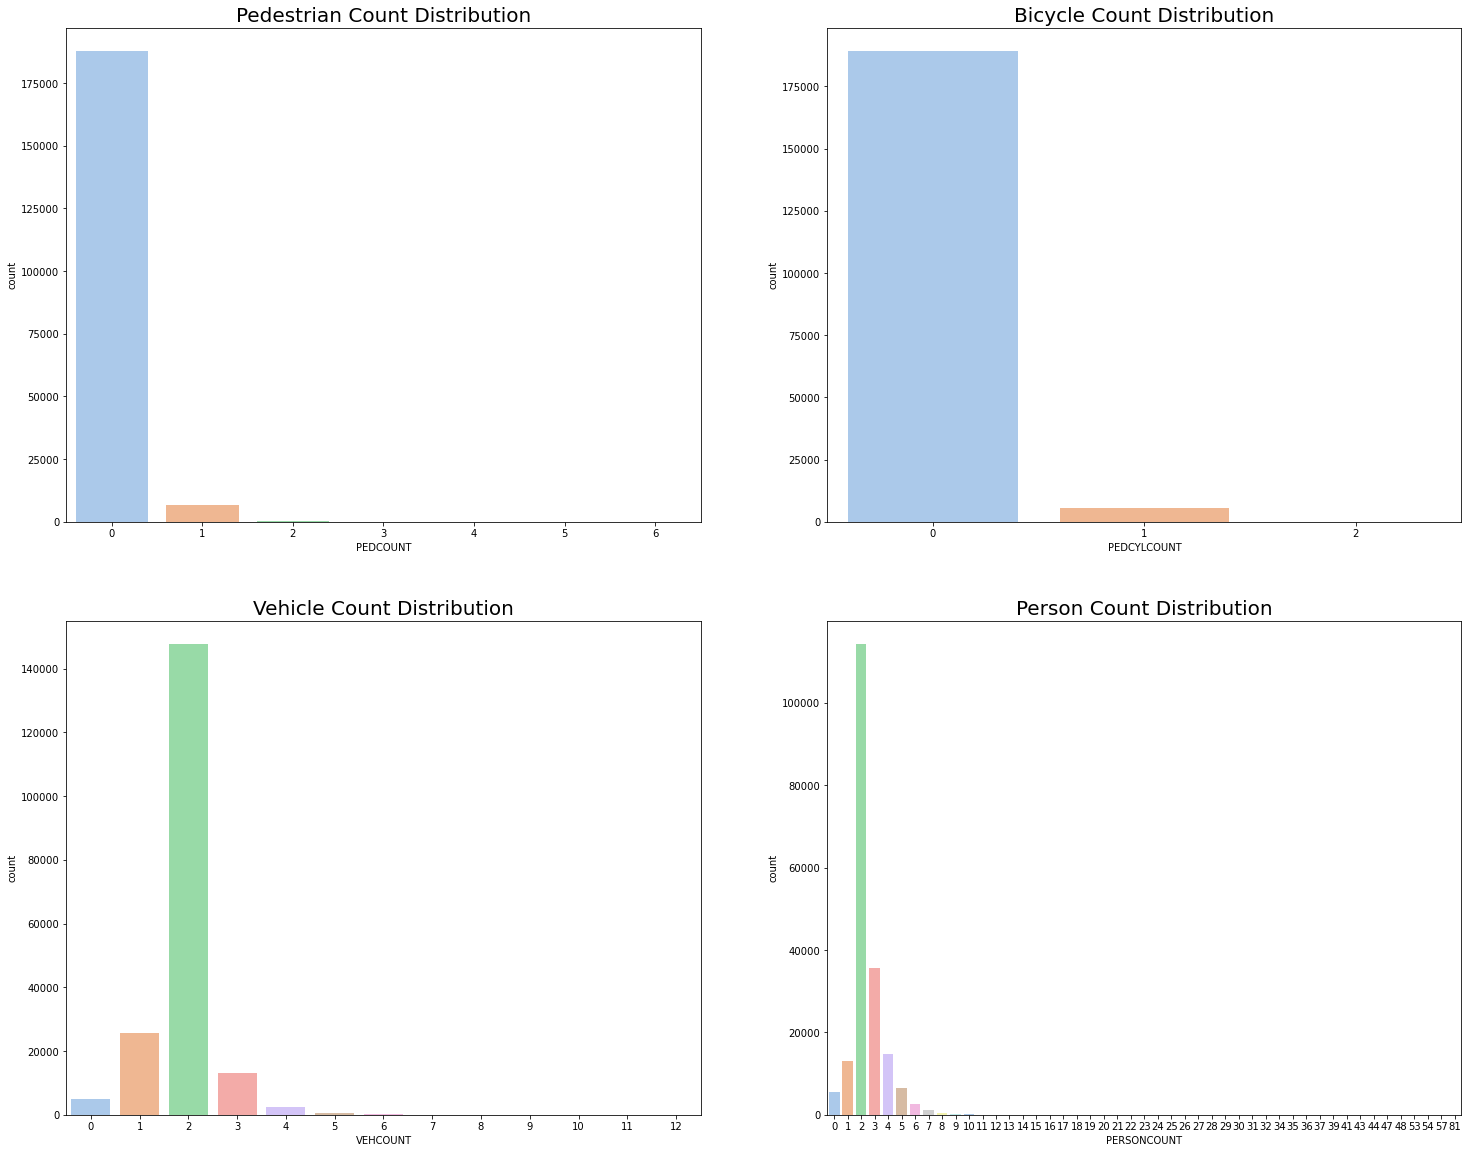

In [139]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 20))
sns.countplot(df['PEDCOUNT'], ax = ax1, palette = 'pastel')
ax1.set_title('Pedestrian Count Distribution', size = 20)
sns.countplot(df['PEDCYLCOUNT'], ax = ax2, palette = 'pastel')
ax2.set_title('Bicycle Count Distribution', size = 20)
sns.countplot(df['VEHCOUNT'], ax = ax3, palette = 'pastel')
ax3.set_title('Vehicle Count Distribution', size = 20)
sns.countplot(df['PERSONCOUNT'], ax = ax4, palette = 'pastel')
ax4.set_title('Person Count Distribution', size = 20)
plt.show()

In this section, we can see from the distribution of data that in most cases, the number of pedestrians and bicycles are 0. There are no cases where the number of bicycles involved in an accident is more than 2. 

Most cases involve 2 vehicles, which makes sense; the number of people involved in a single accident can go up to 81 people, but the majority cases involve 2 people. 

### 3.3.3 Distribution of Accidents Count for Weather Type, Light Condition, Road Condition, Collision Type, Junction Type and Address Type

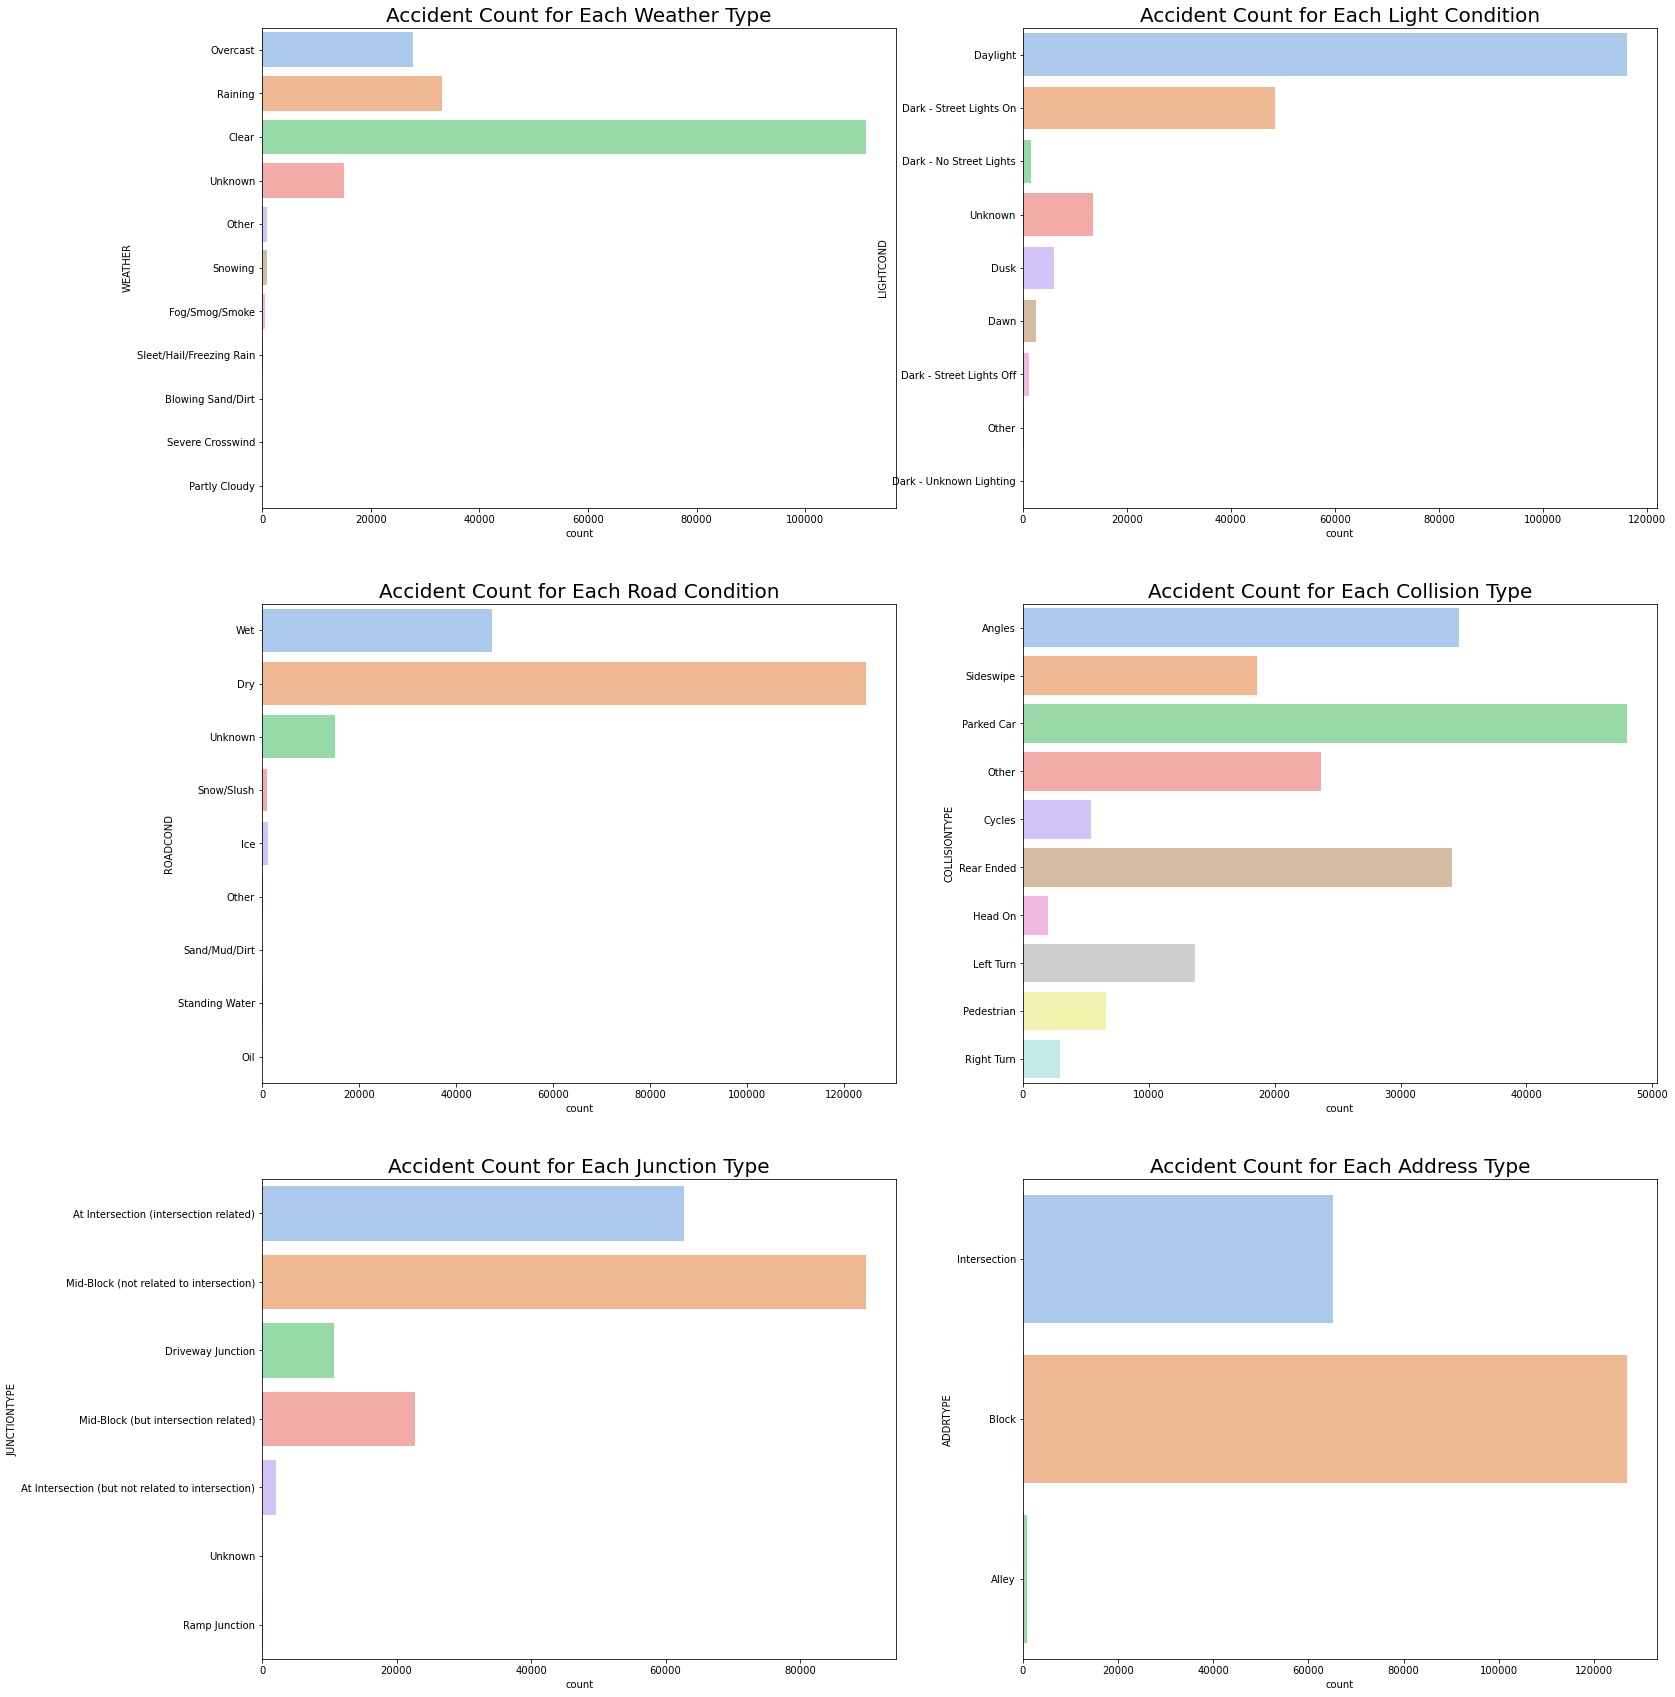

In [140]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (25, 30))
sns.countplot(y = df['WEATHER'], ax = ax1, palette = 'pastel')
ax1.set_title('Accident Count for Each Weather Type', size = 20)
sns.countplot(y = df['LIGHTCOND'], ax = ax2, palette = 'pastel')
ax2.set_title('Accident Count for Each Light Condition', size = 20)
sns.countplot(y = df['ROADCOND'], ax = ax3, palette = 'pastel')
ax3.set_title('Accident Count for Each Road Condition', size = 20)
sns.countplot(y = df['COLLISIONTYPE'], ax = ax4, palette = 'pastel')
ax4.set_title('Accident Count for Each Collision Type', size = 20)
sns.countplot(y = df['JUNCTIONTYPE'], ax = ax5, palette = 'pastel')
ax5.set_title('Accident Count for Each Junction Type', size = 20)
sns.countplot(y = df['ADDRTYPE'], ax = ax6, palette = 'pastel')
ax6.set_title('Accident Count for Each Address Type', size = 20)
plt.show()

### Weather Type VS Severity level

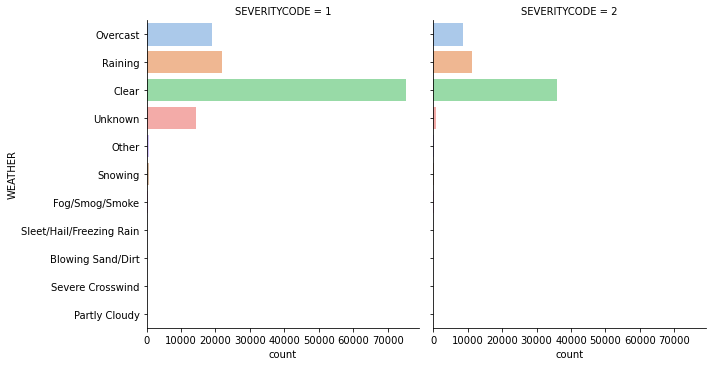

In [141]:
sns.catplot(y="WEATHER", col="SEVERITYCODE",
                data=df, kind="count", palette = 'pastel')

### Collision Type VS Severity Level

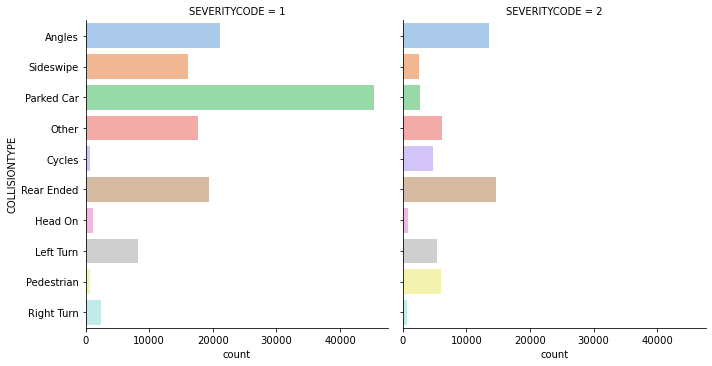

In [142]:
sns.catplot(y="COLLISIONTYPE", col="SEVERITYCODE",
                data=df, kind="count", palette = 'pastel')

### Road Condition VS Severity Level

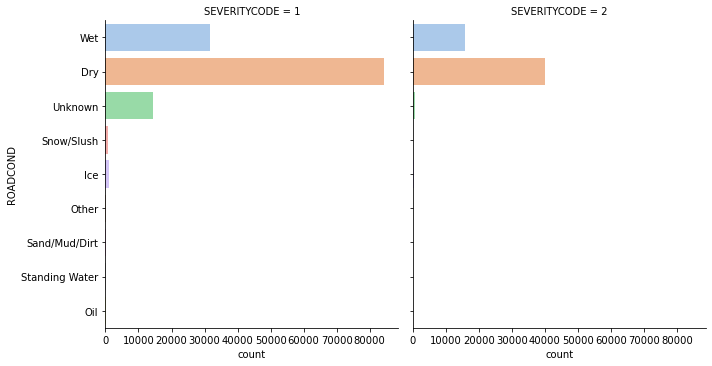

In [143]:
sns.catplot(y="ROADCOND", col="SEVERITYCODE",
                data=df, kind="count", palette = 'pastel')

### Light Condition VS Severity Code

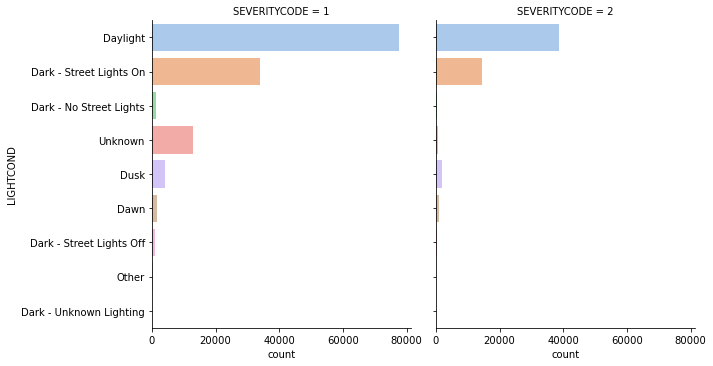

In [144]:
sns.catplot(y="LIGHTCOND", col="SEVERITYCODE",
                data=df, kind="count", palette = 'pastel')

### Junction Type VS Severity Code

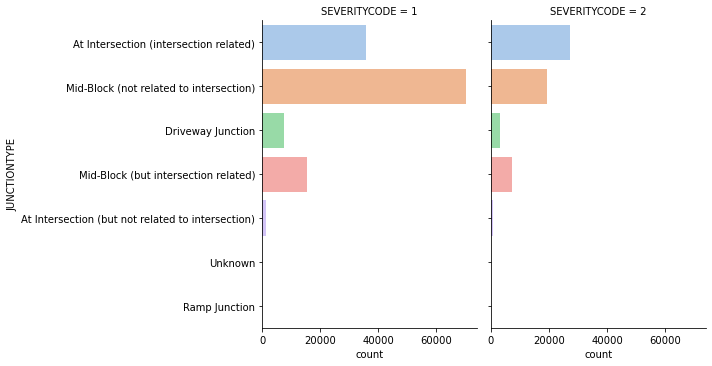

In [145]:
sns.catplot(y="JUNCTIONTYPE", col="SEVERITYCODE",
                data=df, kind="count", palette = 'pastel')

### Address Type VS Severity Code

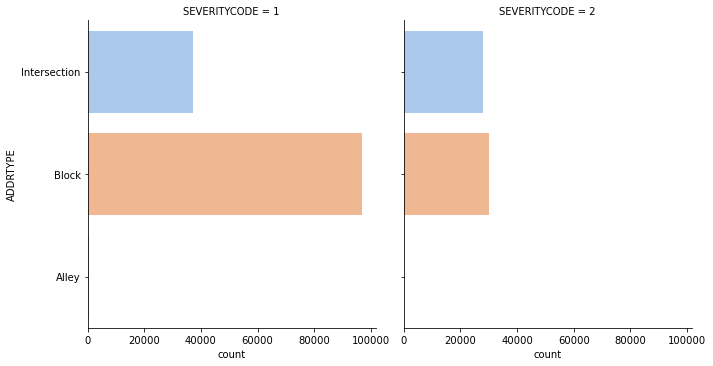

In [146]:
sns.catplot(y="ADDRTYPE", col="SEVERITYCODE",
                data=df, kind="count", palette = 'pastel')

## Under Influence

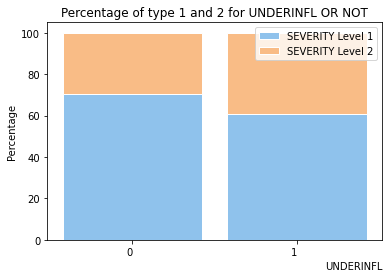

In [147]:
grp = df.groupby('SEVERITYCODE')
r = list(range(int(len(grp['UNDERINFL'].value_counts().values)/2)))
raw_data = {'greenBars': grp['UNDERINFL'].value_counts().values.tolist()[0:int(len(grp['UNDERINFL'].value_counts().values)/2)], 'orangeBars': grp['UNDERINFL'].value_counts().values.tolist()[int(len(grp['UNDERINFL'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['UNDERINFL'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('UNDERINFL', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for UNDERINFL OR NOT')
plt.legend()
plt.show()

## Inattention

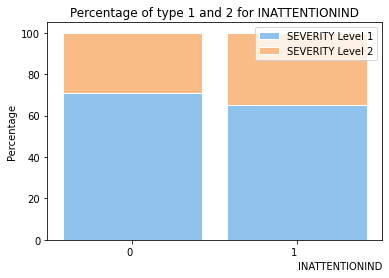

In [148]:
r = list(range(int(len(grp['INATTENTIONIND'].value_counts().values)/2)))
raw_data = {'greenBars': grp['INATTENTIONIND'].value_counts().values.tolist()[0:int(len(grp['INATTENTIONIND'].value_counts().values)/2)], 'orangeBars': grp['INATTENTIONIND'].value_counts().values.tolist()[int(len(grp['INATTENTIONIND'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['INATTENTIONIND'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('INATTENTIONIND', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for INATTENTIONIND')
plt.legend()
plt.show()

## Speeding

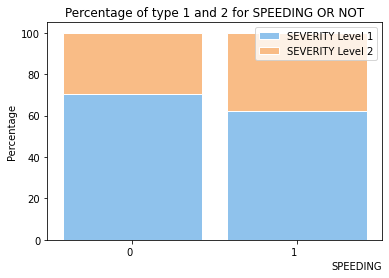

In [149]:
r = list(range(int(len(grp['SPEEDING'].value_counts().values)/2)))
raw_data = {'greenBars': grp['SPEEDING'].value_counts().values.tolist()[0:int(len(grp['SPEEDING'].value_counts().values)/2)], 'orangeBars': grp['SPEEDING'].value_counts().values.tolist()[int(len(grp['SPEEDING'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['SPEEDING'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('SPEEDING', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for SPEEDING OR NOT')
plt.legend()
plt.show()

## Pedestrian right of way was granted

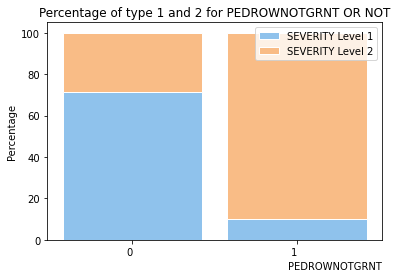

In [150]:
r = list(range(int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2)))
raw_data = {'greenBars': grp['PEDROWNOTGRNT'].value_counts().values.tolist()[0:int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2)], 'orangeBars': grp['PEDROWNOTGRNT'].value_counts().values.tolist()[int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['PEDROWNOTGRNT'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('PEDROWNOTGRNT', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for PEDROWNOTGRNT OR NOT')
plt.legend()
plt.show()

## Hit Parked Car

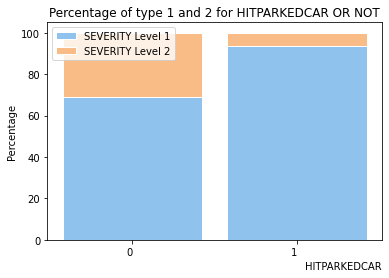

In [151]:
r = list(range(int(len(grp['HITPARKEDCAR'].value_counts().values)/2)))
raw_data = {'greenBars': grp['HITPARKEDCAR'].value_counts().values.tolist()[0:int(len(grp['HITPARKEDCAR'].value_counts().values)/2)], 'orangeBars': grp['HITPARKEDCAR'].value_counts().values.tolist()[int(len(grp['HITPARKEDCAR'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = df['HITPARKEDCAR'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('HITPARKEDCAR', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for HITPARKEDCAR OR NOT')
plt.legend()
plt.show()

### Correlation Between Numerical Variables

In [152]:
df_num = df[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
df_num.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000


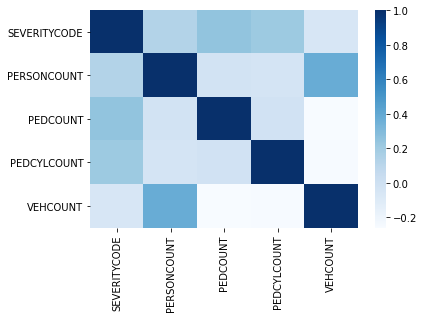

In [153]:
sns.heatmap(df_num.corr(), cmap="Blues")

## Time Series Data

In [154]:
#df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
#df_time = df[['INCDTTM', 'SEVERITYCODE']]
#df_time['Year_Month'] = df['INCDTTM'].dt.strftime('%Y/%m')
#df_time.head()

In [155]:
#df_time_sorted = df_time.set_index('Year_Month').sort_index()
#df_time_sorted.reset_index(inplace = True)

### Monthly Road Accident Count Over Time

In [156]:
#cd_1 = df_time_sorted[df_time_sorted['SEVERITYCODE'] == 1]
#grp_1 = cd_1.groupby(['Year_Month'])
#grp_1.size().plot(kind = 'line', color = 'blue')
#cd_2 = df_time_sorted[df_time_sorted['SEVERITYCODE'] == 2]
#grp_2 = cd_2.groupby(['Year_Month'])
#grp_2.size().plot(kind = 'line', color = 'orange')
#plt.show()

### Road Accidents Count VS Day of Week

In [157]:
#df_time['day_of_week'] = df['INCDTTM'].dt.day_name()
#plt.figure(figsize = (15, 8))
#sns.countplot(x="day_of_week", hue="SEVERITYCODE", data=df_time, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Road Accidents Count VS Months

In [158]:
#df_time['month'] = df['INCDTTM'].dt.month_name()
#plt.figure(figsize = (15, 8))
#sns.countplot(x="month", hue="SEVERITYCODE", data=df_time, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

## Location VS Severity Level

In [159]:
#seattle = gpd.read_file(r'Street_Network_Database__SND_.shp')
#df_geo = df[['X', 'Y', 'SEVERITYCODE']]
#crs = {'init': 'epsg:4326'}
#geometry = [Point(xy) for xy in zip(df_geo['X'], df_geo['Y'])]
#df_geo = gpd.GeoDataFrame(df_geo, crs = crs, geometry = geometry)


In [160]:
#fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 25))
#seattle.plot(ax = ax[0], alpha = 0.4, color = 'grey')
#df_geo[df_geo['SEVERITYCODE'] == 1].plot(ax = ax[0], markersize = 20, color = 'blue', marker = 'o', label = 'Level 1', alpha = 0.01)
#ax[0].legend(prop={'size': 30})
#seattle.plot(ax = ax[1], alpha = 0.4, color = 'grey')
#df_geo[df_geo['SEVERITYCODE'] == 2].plot(ax = ax[1], markersize = 20, color = 'orange', marker = '^', label = 'Level 2', alpha = 0.01)
#ax[1].legend(prop={'size': 30})

## Feature Selection

In [161]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
EXCEPTRSNDESC,189035,0.971039
INTKEY,129603,0.665747
EXCEPTRSNCODE,109862,0.564341
SDOTCOLNUM,79737,0.409595
JUNCTIONTYPE,6329,0.032511
X,5334,0.027400
Y,5334,0.027400
LIGHTCOND,5170,0.026557
WEATHER,5081,0.026100
ROADCOND,5012,0.025746


For this project, we will drop the following features to make the model run faster and make more accurate predictions
1. 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'INTKEY','SEGLANEKEY', 'CROSSWALKKEY': unique identifiers for each for reported road accidents and location where accidents happened. 
2. 'STATUS', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC': text variables that will not be used for this particular project. 
3. 'SDOT_COLCODE', 'SDOTCOLNUM', 'ST_COLCODE': too many levels of values
4. 'INCDATE', 'INCDTTM': Time series data that will not be used for this particular project. 


In [162]:
features = ['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 
       'INATTENTIONIND', 'UNDERINFL', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING','HITPARKEDCAR']
df = df[features]

In [163]:
df[features].isnull().sum()

SEVERITYCODE         0
ADDRTYPE          1926
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
JUNCTIONTYPE      6329
INATTENTIONIND       0
UNDERINFL            0
LIGHTCOND         5170
PEDROWNOTGRNT        0
SPEEDING             0
HITPARKEDCAR         0
dtype: int64

In [164]:
df.dropna(inplace = True)

In [165]:
df[features].isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
HITPARKEDCAR      0
dtype: int64

## Transform Categorical Variables - One-Hot Coding

In [166]:
df_cat = df[['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'LIGHTCOND']]
dummies = pd.get_dummies(df_cat)

In [167]:
df = pd.concat([df, dummies], axis=1)

In [168]:
df.drop(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'LIGHTCOND'], axis = 1, inplace = True)

In [169]:
df.columns

Index(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING',
       'HITPARKEDCAR', 'ADDRTYPE_Alley', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles',
       'COLLISIONTYPE_Head On', 'COLLISIONTYPE_Left Turn',
       'COLLISIONTYPE_Other', 'COLLISIONTYPE_Parked Car',
       'COLLISIONTYPE_Pedestrian', 'COLLISIONTYPE_Rear Ended',
       'COLLISIONTYPE_Right Turn', 'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - S

In [170]:
# Logistic Regression 
# Decision Tree 
# K Nearest Neighbor 
# Random Forest
# Xtreme Gradient Boosting 

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Standardize Numerical Variables 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT'

In [172]:
scale = StandardScaler()
df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']] = scale.fit_transform(df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']])

### Define value X and y And Split Train and Test Dataset

In [173]:
X = df.loc[:, df.columns != 'SEVERITYCODE'].values.astype(float)
y = df['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

### Logistic Regression

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     37943
           2       0.74      0.30      0.43     16972

    accuracy                           0.75     54915
   macro avg       0.74      0.63      0.64     54915
weighted avg       0.75      0.75      0.71     54915

Test set Accuracy:  0.7510698351998544
[[36084  1859]
 [11811  5161]]


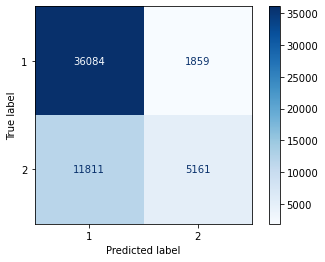

In [174]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
disp = plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict_lr))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_lr))
print(disp.confusion_matrix)

In [175]:
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74811722 0.74874156 0.74870254 0.75112186 0.74560993]
0.7484586226240093


### Decision Tree

              precision    recall  f1-score   support

           1       0.76      0.93      0.83     37943
           2       0.68      0.33      0.45     16972

    accuracy                           0.75     54915
   macro avg       0.72      0.63      0.64     54915
weighted avg       0.73      0.75      0.72     54915

Test set Accuracy:  0.7458982063188564
[[36084  1859]
 [11811  5161]]


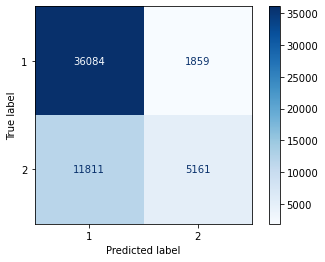

In [176]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
disp = plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict_dt))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_dt))
print(disp.confusion_matrix)

### K-Nearst Neighbors (KNN)

              precision    recall  f1-score   support

           1       0.78      0.83      0.80     37943
           2       0.55      0.46      0.50     16972

    accuracy                           0.72     54915
   macro avg       0.67      0.65      0.65     54915
weighted avg       0.71      0.72      0.71     54915

Test set Accuracy:  0.7188017845761632
[[31612  6331]
 [ 9111  7861]]


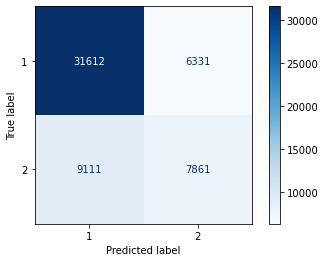

In [177]:
knn = KNeighborsClassifier(n_jobs = -1)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
disp = plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues)

print(classification_report(y_test, y_predict_knn))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_knn))
print(disp.confusion_matrix)

## XGBoost

              precision    recall  f1-score   support

           1       0.76      0.94      0.84     37943
           2       0.71      0.32      0.45     16972

    accuracy                           0.75     54915
   macro avg       0.74      0.63      0.64     54915
weighted avg       0.74      0.75      0.72     54915

Test set Accuracy:  0.7511790949649458
[[35744  2199]
 [11465  5507]]


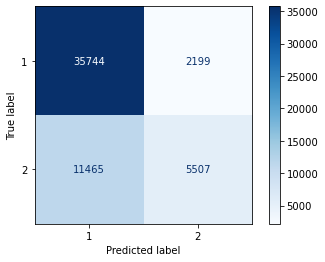

In [178]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =0)
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
disp = plot_confusion_matrix(xgb, X_test, y_test,cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict_xgb))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_xgb))
print(disp.confusion_matrix)

### Random Forest

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     37943
           2       0.67      0.35      0.46     16972

    accuracy                           0.75     54915
   macro avg       0.72      0.64      0.65     54915
weighted avg       0.73      0.75      0.72     54915

Test set Accuracy:  0.7467722844395884
[[35058  2885]
 [11021  5951]]


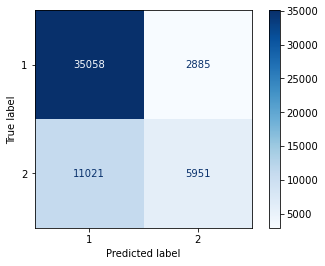

In [179]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
disp = plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues)
print(classification_report(y_test, y_predict_rf))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_rf))
print(disp.confusion_matrix)

## Tuning Model Performance

### Logistic Regression Tuning

In [180]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [181]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [182]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.6min finished


Logistic Regression
Best Score: 0.7490127299820312
Best Parameters: {'C': 0.012742749857031334, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


### Decision Tree Tuning

In [183]:
dt = DecisionTreeClassifier()
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8,10,12]}

clf_dt = GridSearchCV(dt, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_dt = clf_dt.fit(X_train,y_train)
clf_performance(best_clf_dt,'Decision Tree')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.2s finished


Decision Tree
Best Score: 0.7488254138230658
Best Parameters: {'criterion': 'entropy', 'max_depth': 8}


### K-Nearest Neighbors Tuning

### XGB Tuning

In [184]:
xgb = XGBClassifier(random_state = 0)
param_grid = {'n_estimators': [450,500,550]
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.2min finished


XGB
Best Score: 0.7490439394441479
Best Parameters: {'n_estimators': 500}
